# Análise inicial dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/Dataset/creditcard.csv"
df = pd.read_csv(path)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64


<Axes: ylabel='Class'>

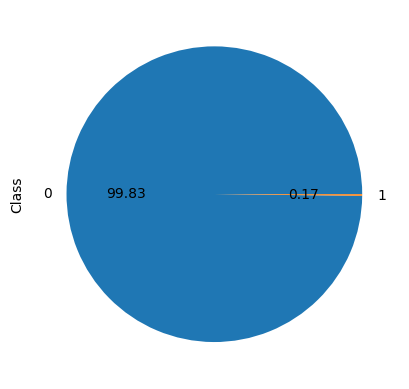

In [ ]:
class_counts = df["Class"].value_counts()
print(class_counts)
class_counts.plot.pie(autopct="%.2f")

# Análise do dados utilizando a estratégia de Under-Sampling

0    492
1    492
Name: Class, dtype: int64


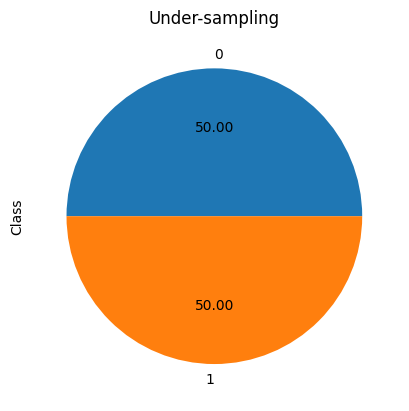

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop("Class", axis=1)
y = df["Class"]

rus = RandomUnderSampler(random_state=42, sampling_strategy="not minority")
X_rus, y_rus = rus.fit_resample(X, y)

print(y_rus.value_counts())
ax = y_rus.value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Under-sampling")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(
  X_rus, y_rus, test_size=0.2, random_state=42
)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(f"(Train) Root Mean Square Error: {rmse}")

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(f"(Test) Root Mean Square Error: {rmse}")

(Train) Root Mean Square Error: 0.3536781580004089
(Test) Root Mean Square Error: 0.48263705025476833


# Análise do dados utilizando a estratégia de Over-Sampling

0    284315
1    284315
Name: Class, dtype: int64


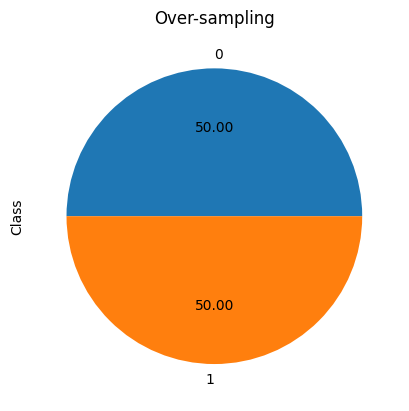

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy="not majority")
X_ros, y_ros = ros.fit_resample(X, y)

print(y_ros.value_counts())
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(
  X_ros, y_ros, test_size=0.2, random_state=42
)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(f"(Train) Root Mean Square Error: {rmse}")

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(f"(Test) Root Mean Square Error: {rmse}")

(Train) Root Mean Square Error: 0.012609833777476421
(Test) Root Mean Square Error: 0.0216329935024495


# Análise do dados utilizando a estratégia de SMOTE

0    284315
1    284315
Name: Class, dtype: int64


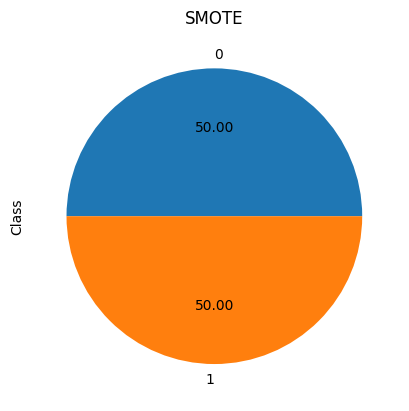

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42,sampling_strategy='minority')
X_smote, y_smote = sm.fit_resample(X, y)

print(y_smote.value_counts())
ax = y_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(
  X_smote, y_smote, test_size=0.2, random_state=42
)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(f"(Train) Root Mean Square Error: {rmse}")

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(f"(Test) Root Mean Square Error: {rmse}")

(Train) Root Mean Square Error: 0.0932319046599036
(Test) Root Mean Square Error: 0.14767456045041547


# Comparação entre os 3 modelos

Utilização do algoritmo de classificação 3NN para obters os resultados.

#### Modelo Under-Sampling
Resultados:  
(Train) Root Mean Square Error: 0.3536781580004089  
(Test) Root Mean Square Error: 0.48263705025476833


#### Modelo Under-Sampling
Resultados:  
(Train) Root Mean Square Error: 0.012609833777476421  
(Test) Root Mean Square Error: 0.0216329935024495


#### Modelo Under-Sampling
Resultados:  
(Train) Root Mean Square Error: 0.0932319046599036  
(Test) Root Mean Square Error: 0.14767456045041547